## SVM for hand-written digit recognition

In [62]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

pd.set_option("max_columns", 150)
sns.set_style("ticks")
sns.set_context("paper")

In [63]:
mnist = load_digits(n_class=10)

# 1 - Explore the dataset

## 1.a - Printing the general description of the dataset

In [64]:
print(type(mnist))
mnist

<class 'sklearn.utils.Bunch'>


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

## 1.b - Printing the target names and the shape of the images

In [65]:
print("The target names: {}".format(mnist.target_names))
print("The shape of the images: {}".format(mnist.images.shape))

The target names: [0 1 2 3 4 5 6 7 8 9]
The shape of the images: (1797, 8, 8)


# 2 - Relationship between mnist.images and data

## 2.a - Printing the shape of "mnist.images" and "mnist.data".

In [66]:
print("The shape of 'mnist.images': {}".format(mnist.images.shape))
print("The shape of 'mnist.data': {}".format(mnist.data.shape))

The shape of 'mnist.images': (1797, 8, 8)
The shape of 'mnist.data': (1797, 64)


## 2.b - What do you think is the relationship between them?

It looks values of images and data are the same but in images, the data stores as the 8X8 matrix which corresponds to the number of pixels

# 3 - Visualization & Modeling

## 3.a - Visualize and present the dataset

In [67]:
# Converting "mnist" dataset to DataFrame. 
# "mnist.data" and "mnist.target" values used in DataFrame.
df = pd.DataFrame(data=np.c_[mnist.data, mnist.target] )
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


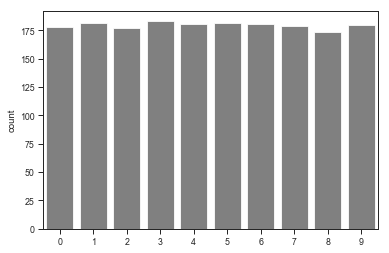

In [68]:
sns.countplot(mnist.target, color='grey');

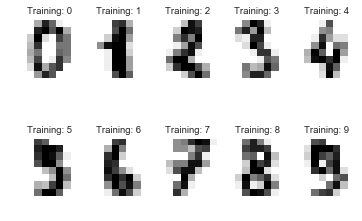

In [69]:
images_and_labels = list(zip(mnist.images, mnist.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

## 3.b - Apply the SVC to perform multi-class classification

In [70]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size=0.8, random_state=10)

print("The shape of 'X_train': {}".format(X_train.shape))
print("The shape of 'X_test': {}".format(X_test.shape))
print("The shape of 'y_train': {}".format(y_train.shape))
print("The shape of 'y_test': {}".format(y_test.shape))

The shape of 'X_train': (1437, 64)
The shape of 'X_test': (360, 64)
The shape of 'y_train': (1437,)
The shape of 'y_test': (360,)


In [71]:
# Creating SVM algorithm (base form)
# and fitting
svm1 = svm.SVC()
svm1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
# Predicting new "target" values based on "svm1" (base form) algorithm 
y_pred = svm1.predict(X_test)

## 3.c - Comment on the usage of the different kernels and the effect of the hyper-parameters

Gamma: Define how far the influence of a single training example reach. Low values: influence the training values that are far away more than the closer values. High values: influence the training values that are closer more than the one´s that are further.

Kernel: Separate data that is not linearly separatable.

Decision_function_shape: One-vs-one classification better for multiclass classification

C: Penalty parameter C of the error term. when you have some noise in the data set, you can tune the C-value to be able to adjust this.

In [73]:
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': [1, 10, 100],
              'gamma': [1e-10, 1e-5, 1e-3, 1e-2, 1e-1, 1],
              'decision_function_shape': ('ovo', 'ovr')
             }
svm2 = svm.SVC()
svm2 = GridSearchCV(svm2, parameters)
svm2.fit(X_train, y_train)
svm2.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'rbf'}

In [74]:
y_pred2 = svm2.predict(X_test)

## 3.d - Visualize the results with a confusion matrix

Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  1  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  1 38]]

--------


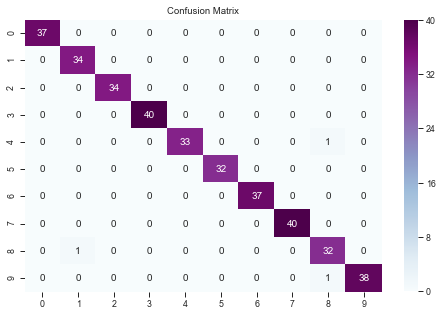

In [75]:
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n{}".format(cm))
plt.figure(figsize = (8,5))
print("\n--------")
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, cmap=plt.cm.BuPu);# font size

## 3.e - Create a grid with different test examples showing the predicted and the true label

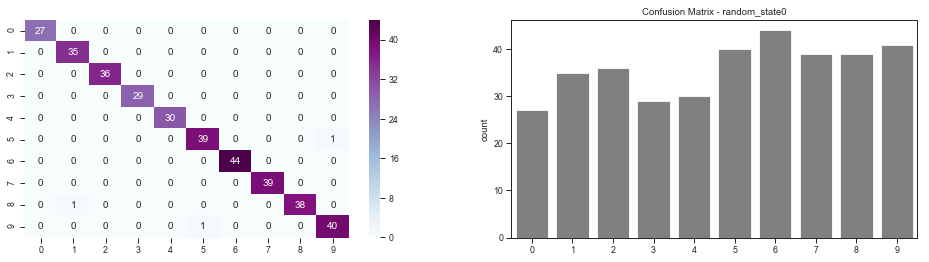

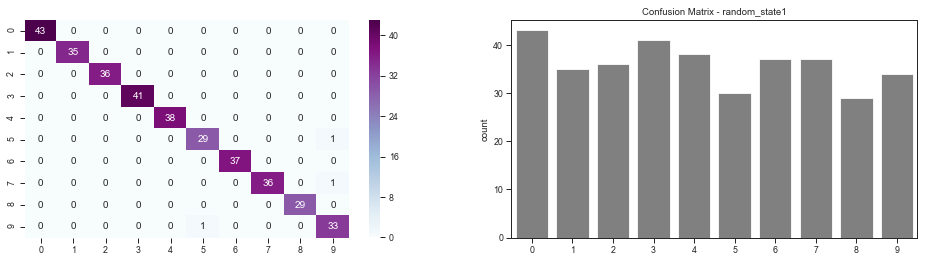

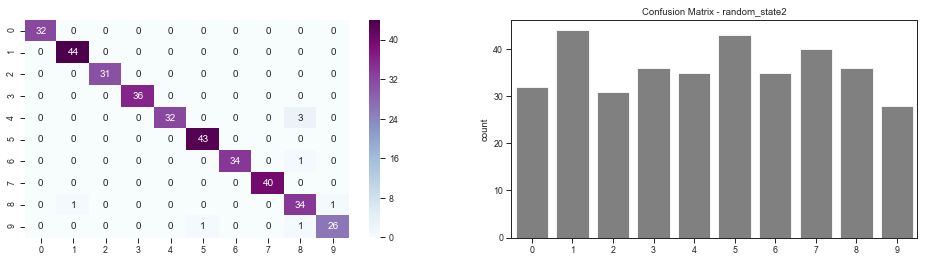

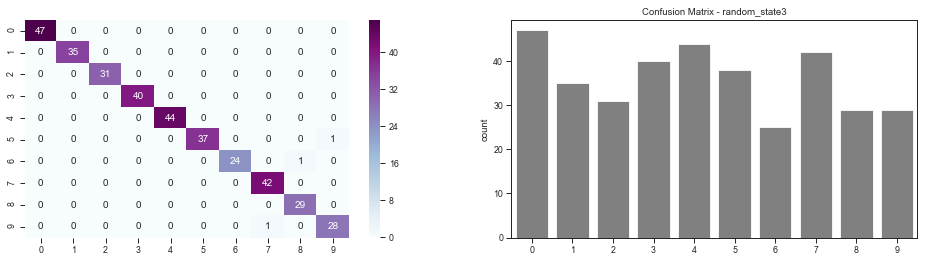

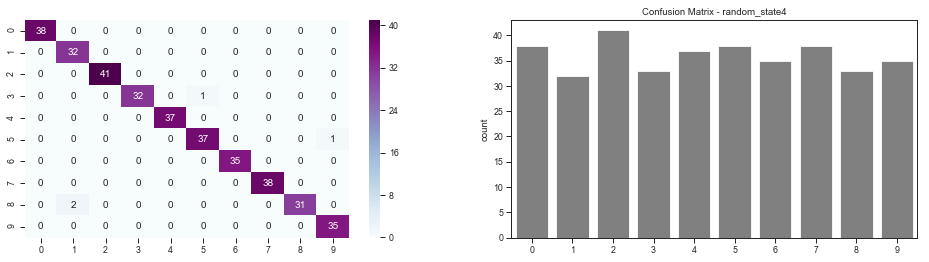

In [76]:
for i in range(0,5):
    X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(mnist.data, mnist.target, train_size=0.8, random_state=i)
    svm2.fit(X_train_t, y_train_t)
    y_pred3 = svm2.predict(X_test_t)
    cm_t = confusion_matrix(y_test_t, y_pred3)
    fig, axes = plt.subplots(1,2, figsize=(16,4))
    
    sns.countplot(y_test_t, color='grey')
#     unique_test_t, counts_test_t = np.unique(y_test_t, return_counts=True)
#     (unique_test_t, counts_test_t, "The number of 'target' variables in 'y_test'", axes[1]);
    plt.title("Confusion Matrix - random_state{}".format(i))
    sns.heatmap(cm_t, annot=True, annot_kws={"size": 10}, cmap=plt.cm.BuPu, ax = axes[0]);

## 3.f - Compute the accuracy score and comment on the results

In [77]:
print("Accuracy score: {:.4f}".format(accuracy_score(y_test,y_pred2)))

Accuracy score: 0.9917


In [78]:
print(classification_report(y_test,y_pred2))
# The result of 'classification_report' show very good accuracy scores 
# but for some values, such as 0,3,5,6,7, the result shows only 100% percentage.
# That might causes a problem in the future.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        40
           4       1.00      0.97      0.99        34
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.94      0.97      0.96        33
           9       1.00      0.97      0.99        39

   micro avg       0.99      0.99      0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [79]:
# For more detail result;
print("Average: 'macro',\nprecision: {:.4f}, recall: {:.4f}, f1_score: {:.4f}\n".format(
    precision_recall_fscore_support(y_test, y_pred2, average='macro')[0],
    precision_recall_fscore_support(y_test, y_pred2, average='macro')[1],
    precision_recall_fscore_support(y_test, y_pred2, average='macro')[2]))

print("Average: 'micro',\nprecision: {:.4f}, recall: {:.4f}, f1_score: {:.4f}\n".format(
    precision_recall_fscore_support(y_test, y_pred2, average='micro')[0],
    precision_recall_fscore_support(y_test, y_pred2, average='micro')[1],
    precision_recall_fscore_support(y_test, y_pred2, average='micro')[2]))


print("Average: 'weighted',\nprecision: {:.4f}, recall: {:.4f}, f1_score: {:.4f}\n".format(
    precision_recall_fscore_support(y_test, y_pred2, average='weighted')[0],
    precision_recall_fscore_support(y_test, y_pred2, average='weighted')[1],
    precision_recall_fscore_support(y_test, y_pred2, average='weighted')[2]))

Average: 'macro',
precision: 0.9913, recall: 0.9915, f1_score: 0.9913

Average: 'micro',
precision: 0.9917, recall: 0.9917, f1_score: 0.9917

Average: 'weighted',
precision: 0.9919, recall: 0.9917, f1_score: 0.9917



## 3.g - Perform any other experiments that you can think of, always reason about the results!

With "Kfold" and "cross-validaiton", we are going to apply same algorithm to our all dataset iteratively. With this way, we are able to see the scores for all dataset

In [80]:
# K-fold
k_fold = KFold(n_splits=6)
i=0
for train_indices, test_indices in k_fold.split(mnist.data):
    svm2.fit(mnist.data[train_indices], mnist.target[train_indices])
    pred = svm2.predict(mnist.data[test_indices])
    acc = accuracy_score(mnist.target[test_indices], pred)
    print("Len of train: {}, K-fold{} accuracy score: {:.4f}".format(len(mnist.data[train_indices]), i, acc ))
    i=i+1
#    print(accuracy_score(mnist.target[test_indices], pred))

Len of train: 1497, K-fold0 accuracy score: 0.9800
Len of train: 1497, K-fold1 accuracy score: 0.9800
Len of train: 1497, K-fold2 accuracy score: 0.9867
Len of train: 1498, K-fold3 accuracy score: 0.9900
Len of train: 1498, K-fold4 accuracy score: 0.9967
Len of train: 1498, K-fold5 accuracy score: 0.9532


In [81]:
# Cross-validation
all_accuracies = cross_val_score(estimator=svm2, X=X_train, y=y_train, cv=5)  
for i, value in enumerate(all_accuracies):
    print("Cross-validation-{} score: {:.4f}".format(i, value))

Cross-validation-0 score: 0.9863
Cross-validation-1 score: 0.9931
Cross-validation-2 score: 0.9861
Cross-validation-3 score: 0.9965
Cross-validation-4 score: 0.9894


## 3.h. RANDOM FOREST ALGORITHM

In [82]:
# Defining hyper-parameter search list

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 7, 10, 20]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions = random_grid,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 5, 7, 10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [84]:
print(rf_random.best_params_)

{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [85]:
y_pred_rf = rf_random.predict(X_test)

In [86]:
print("Accuracy score: {:.4f}".format(accuracy_score(y_test,y_pred_rf)))

Accuracy score: 0.9722


## 3.i. Logistic Regression Model

In [87]:
lm = LogisticRegression()
param = {'C' : [.01, .1, 1, 10, 100]}

In [88]:
lm_grid = GridSearchCV(lm, param)

In [89]:
lm_grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [90]:
print('train set score : {:.4f}'.format(lm_grid.score(X_train, y_train)))
print('test set score : {:.4f}'.format(lm_grid.score(X_test, y_test)))
print('accuracy score : {:.4f}'.format(accuracy_score(y_test, lm_grid.predict(X_test))))

train set score : 0.9833
test set score : 0.9583
accuracy score : 0.9583


### 3.j. KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [93]:
print('train set score : {:.4f}'.format(knn.score(X_train, y_train)))
print('test set score : {:.4f}'.format(knn.score(X_test, y_test)))

train set score : 0.9847
test set score : 0.9806


# 4. Conclusion

In [94]:
top_score = 0;

for i, j in zip([rf_random, lm_grid, knn], ['RandomForest', 'Logistic Regression', 'kNN']):
    if i.score(X_test, y_test) > top_score: 
        top_score = i.score(X_test, y_test);
        
print('The winner is {} with {:.4f} score!'.format(j, top_score))

The winner is kNN with 0.9806 score!
